# ManimCE with MatPlotLib and other libraries

In [3]:
from manim import *
config.media_embed = True; config.media_width = "100%"
_RV = "-v WARNING -qm --progress_bar None --disable_caching Example"
_RI = "-v WARNING -s --progress_bar None --disable_caching Example"

Manim Community v0.15.1

In [7]:
import matplotlib.pyplot as plt


plt.rcParams['figure.dpi'] = 120

def fxt(amplitude, x, dt):
    return amplitude * np.sin(x + dt)

def get_image_from_plt(amplitude, x, dt):
    fig, ax = plt.subplots()
    ax.plot(x, fxt(amplitude, x, dt))
    ax.set_ylim(-1, 1)
    fig.canvas.draw()

In [5]:
x_values = np.linspace(0, 30, 200)
amp_start = 0.5
dt_start = 0

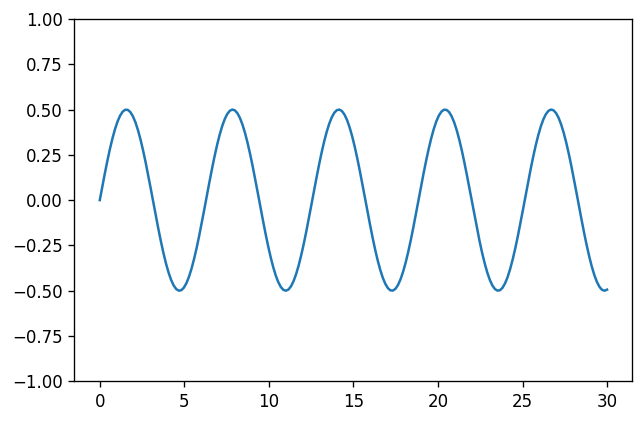

In [8]:
get_image_from_plt(amp_start, x_values, dt_start)

In [12]:
def get_image_from_plt(amplitude, x, dt):
    fig, ax = plt.subplots()
    ax.plot(x, fxt(amplitude, x, dt))
    ax.set_ylim(-1, 1)
    fig.canvas.draw()
    img = ImageMobject(fig.canvas.buffer_rgba(),invert=True).scale(2) # <- Convert to ImageMobject
    plt.close(fig)
    return img

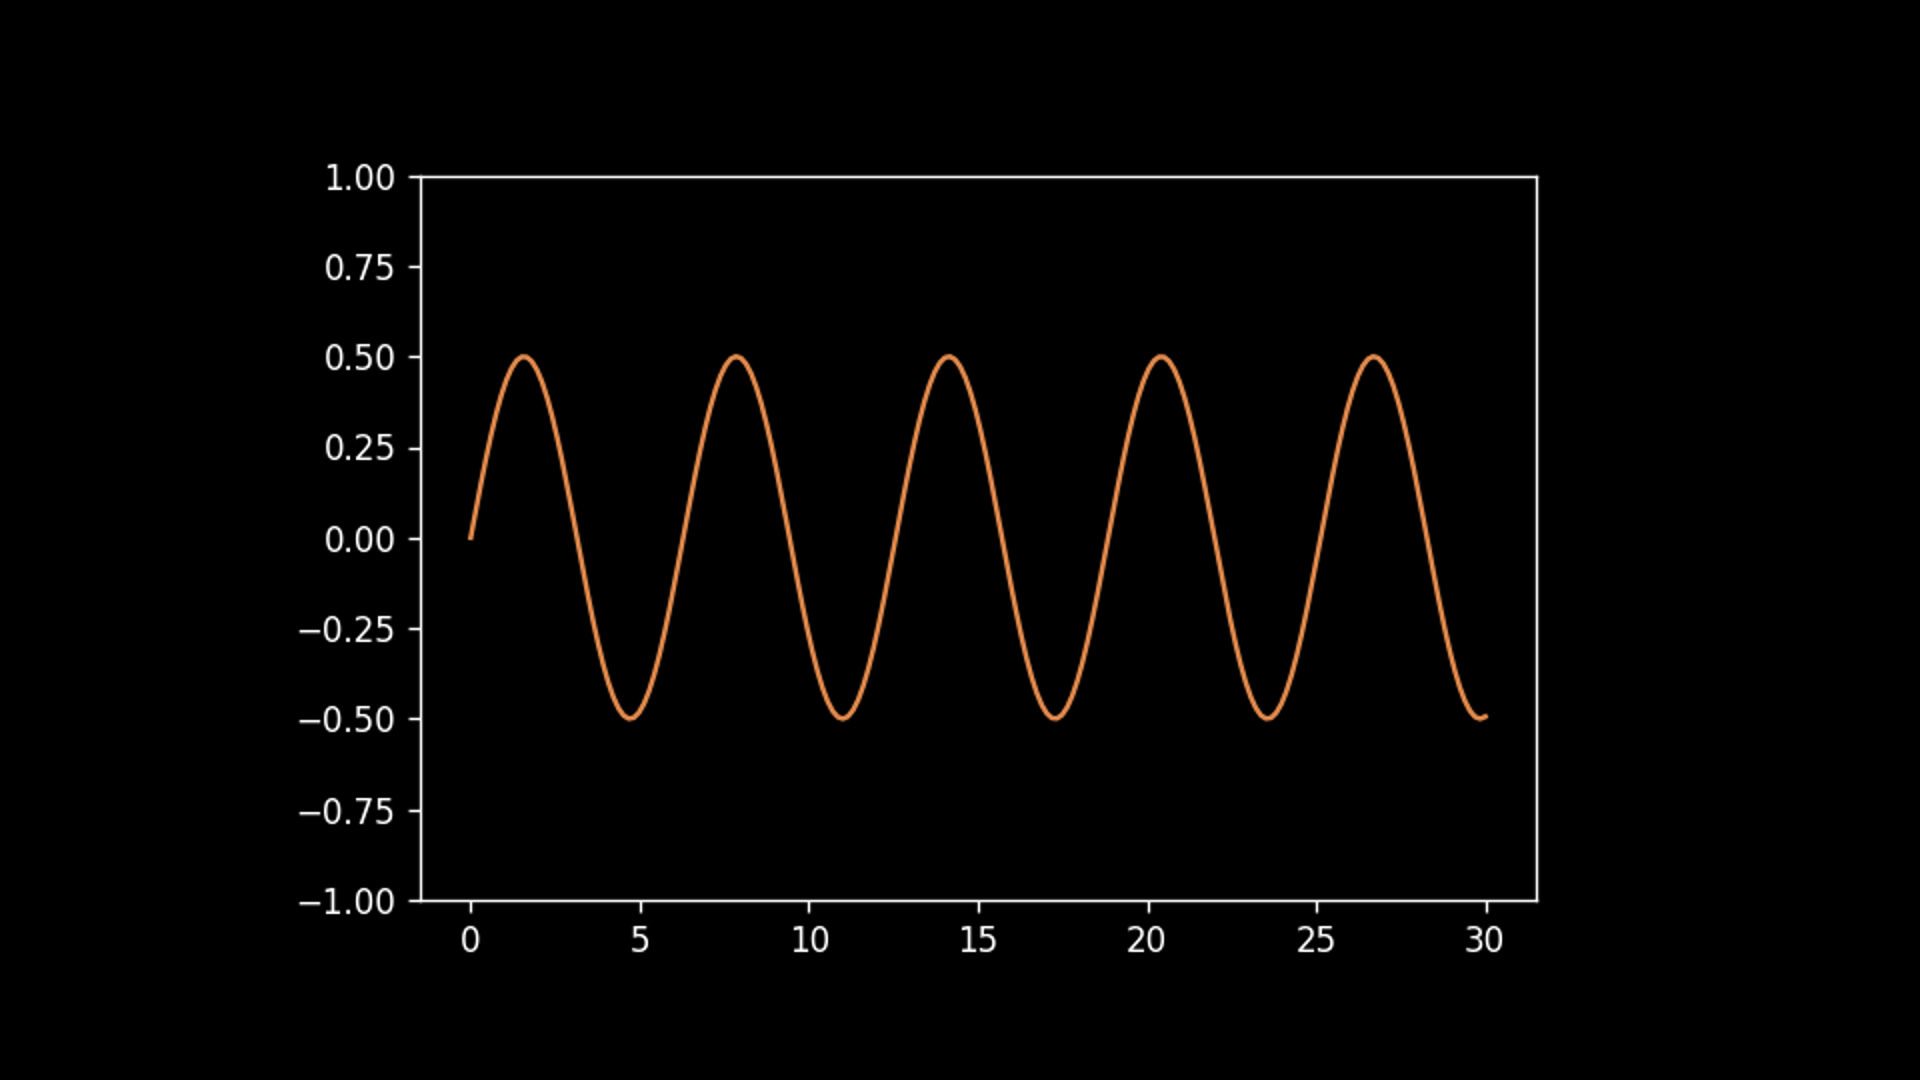

In [15]:
class Example(Scene):
    def construct(self):
        x_values = np.linspace(0, 30, 200)
        amp_start = 0.5
        dt_start = 0
        image = get_image_from_plt(amp_start, x_values, dt_start)
        self.add(image)

%manim $_RI

In [16]:
class Example(Scene):
    def construct(self):
        x_values = np.linspace(0, 30, 200)
        amp_start = 0.5
        amp_end   = 1
        dt_start = 0
        dt_end   = PI
        amplitude_tr = ValueTracker(amp_start)
        dt_tr = ValueTracker(dt_start)
        image = get_image_from_plt(amp_start, x_values, dt_start)
        self.add(image)

        image.add_updater(
            lambda mob: mob.become(
                get_image_from_plt(amplitude_tr.get_value(), x_values, dt_tr.get_value())
            )
        )

        self.play(dt_tr.animate.set_value(dt_end), run_time=3)
        self.play(amplitude_tr.animate.set_value(amp_end), run_time=3)
        self.wait()

%manim $_RV

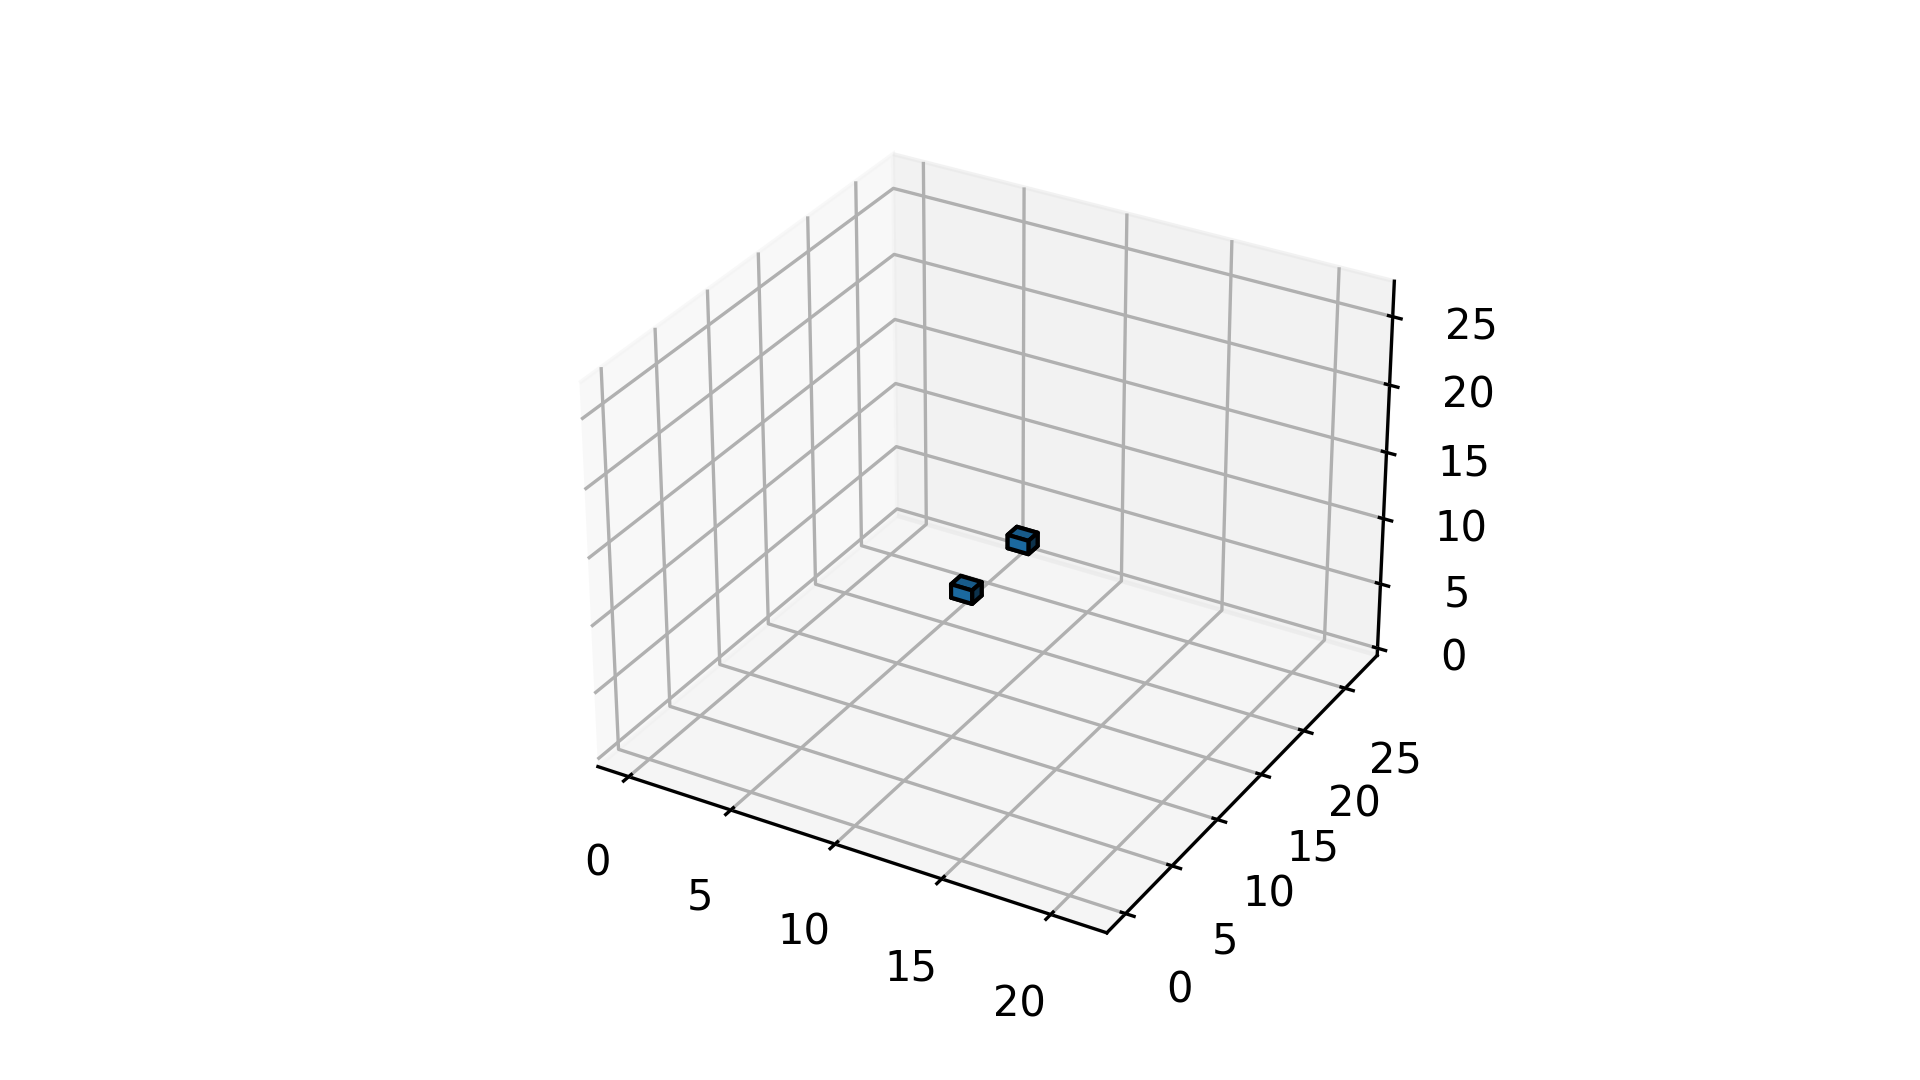

In [18]:
plt.rcParams['figure.dpi'] = 300

class Example(Scene):
    def construct(self):
        self.camera.background_color= WHITE
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        x = np.full((21,27,27), 0)
        x[10,10,10] = 1
        x[10,16,10] = 1
        ax.voxels(x, edgecolor='k')
        fig.canvas.draw()
        buf = fig.canvas.buffer_rgba()
        img = ImageMobject(buf).scale(1)
        plt.close(fig)
        self.add(img)
%manim $_RI

In [19]:
def get_3d_img_from_plt(amp1,x):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.view_init(elev=40 + 3 * np.sin(amp1), azim=20 + 10 * np.cos(amp1))
    ax.voxels(x, edgecolor='k')
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.axes.zaxis.set_ticklabels([])
    fig.canvas.draw()
    buf = fig.canvas.buffer_rgba()
    img = ImageMobject(buf)
    plt.close(fig)
    return img

In [20]:
class Example(Scene):
    def construct(self):
        self.camera.background_color = WHITE
        x=np.full((21,27,27),0)
        x[10,10,10] = 1
        x[10,16,10] = 1
        amp1 = 0
        amp2 = TAU
        tr_amplitude = ValueTracker(amp1)
        image = get_3d_img_from_plt(amp1, x)
        self.add(image)

        image.add_updater(
            lambda mob: mob.become(
                get_3d_img_from_plt(tr_amplitude.get_value(), x)
            )
        )

        self.play(tr_amplitude.animate.set_value(amp2), run_time=4)
        self.wait()

In [21]:
%%time
%%manim $_RV
class Example(Example):
    pass

CPU times: user 1min 13s, sys: 32.5 s, total: 1min 45s
Wall time: 36.2 s
